In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
names = ['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height','Orientation','Glazing_Area',\
        'Glazing_Area_Distribution','Heating_Load','Cooling_Load']
data = pd.read_csv('energy.csv', header=None, names=names)
print(data.head())
print('Data Set Dimension:',data.shape)

   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

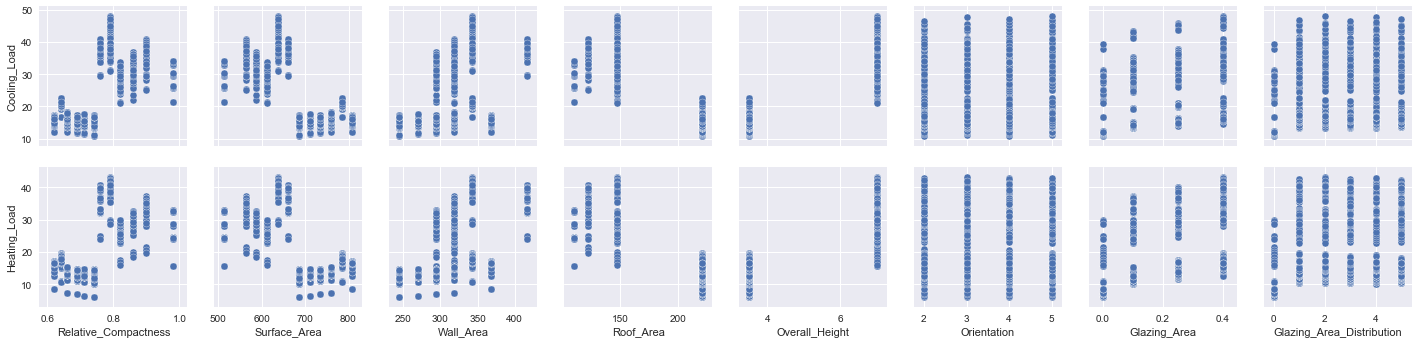

In [4]:
sns.pairplot(data=data, y_vars=['Cooling_Load','Heating_Load'], x_vars=['Relative_Compactness','Surface_Area',\
                                                                        'Wall_Area','Roof_Area','Overall_Height',\
                                                                        'Orientation','Glazing_Area','Glazing_Area_Distribution'])
plt.show()

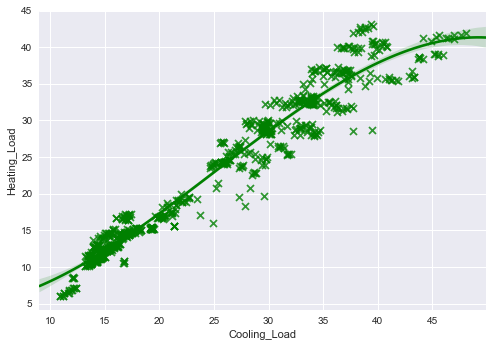

In [5]:
sns.regplot(x = data.Cooling_Load, y = data.Heating_Load,order=3,marker='x',color='green')
plt.show()

In [6]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = data.drop(['Heating_Load','Cooling_Load'], axis=1)
X = sc.fit_transform(X)
y = data[['Heating_Load','Cooling_Load']]

print('Feature Variable Dimension:',X.shape)
print('Target Variable Dimension:',y.shape)

Feature Variable Dimension: (768, 8)
Target Variable Dimension: (768, 2)


In [7]:
# TRAIN-TEST-SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

print('X Train:',X_train.shape)
print('X Test:',X_test.shape)
print('Y Train:',y_train.shape)
print('Y Test:',y_test.shape)

X Train: (576, 8)
X Test: (192, 8)
Y Train: (576, 2)
Y Test: (192, 2)


<h1>Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)

linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

print("Accuracy on Training set: %f" % linreg.score(X_train, y_train))
print("Accuracy on Test set: %f" % linreg.score(X_test, y_test))


Accuracy on Training set: 0.896958
Accuracy on Test set: 0.919456


In [9]:
# METRICS
print('Mean Absolute Error:',mean_absolute_error(y_test, linreg_pred, sample_weight=None, multioutput='uniform_average'))

print('Variance:',explained_variance_score(y_test, linreg_pred, multioutput='variance_weighted'))

print('MSE:',mean_squared_error(y_test, linreg_pred, sample_weight=None, multioutput='uniform_average'))

print('Root MSE:',np.sqrt(mean_squared_error(y_test, linreg_pred, sample_weight=None, multioutput='uniform_average')))

print('R squared:',r2_score(y_test, linreg_pred, sample_weight=None, multioutput='uniform_average'))

Mean Absolute Error: 1.94122258179
Variance: 0.919772154031
MSE: 7.41661175002
Root MSE: 2.72334569051
R squared: 0.918887111441


<h1>Decision Tree Regressor

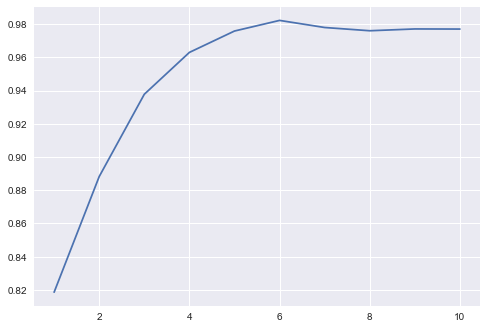

In [10]:
from sklearn.tree import DecisionTreeRegressor
tr_acc = []
tr_depth = range(1,11)
for i in tr_depth:
    tr = DecisionTreeRegressor(random_state=0, max_depth=i)
    tr.fit(X_train, y_train)
    tr_acc.append(tr.score(X_test, y_test))

plt.plot(tr_depth,tr_acc)
plt.show()

In [11]:
tr_index = tr_acc.index(max(tr_acc))+1
print('Max Accuracy = %f at Max Depth of %d' %(max(tr_acc),tr_index))


Max Accuracy = 0.982222 at Max Depth of 6


In [12]:
tr = DecisionTreeRegressor(random_state=0, max_depth=tr_index)

tr.fit(X_train, y_train)
tr_pred = tr.predict(X_test)

print("Accuracy on Training set: %f" % tr.score(X_train, y_train))
print("Accuracy on Test set: %f" % tr.score(X_test, y_test))


Accuracy on Training set: 0.985656
Accuracy on Test set: 0.982222


In [13]:
# METRICS
print('Mean Absolute Error:',mean_absolute_error(y_test, tr_pred, sample_weight=None, multioutput='uniform_average'))

print('Variance:',explained_variance_score(y_test, tr_pred, multioutput='variance_weighted'))

print('MSE:',mean_squared_error(y_test, tr_pred, sample_weight=None, multioutput='uniform_average'))

print('Root MSE:',np.sqrt(mean_squared_error(y_test, tr_pred, sample_weight=None, multioutput='uniform_average')))

print('R squared:',r2_score(y_test, tr_pred, sample_weight=None, multioutput='variance_weighted'))

Mean Absolute Error: 0.743173498866
Variance: 0.982265745345
MSE: 1.63703289808
Root MSE: 1.27946586437
R squared: 0.982222008971


In [14]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tr, X, y, cv=10, n_jobs=-1, scoring='r2')
print('R squared:',scores)
print('Mean R squared:', np.mean(scores))

R squared: [ 0.79263427  0.97923226  0.97125533  0.97509958  0.98734713  0.97449768
  0.98552526  0.98312347  0.96871295  0.98548482]
Mean R squared: 0.960291275701
